In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import torch
import pandas as pd
from brokenaxes import brokenaxes

random.seed(0)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times Roman'] + plt.rcParams['font.serif']
_font_base = 4
SMALL_SIZE = 8 + _font_base
MEDIUM_SIZE = 10 + _font_base
BIGGER_SIZE = 12 + _font_base
plt.rcParams['lines.markersize'] = 4

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


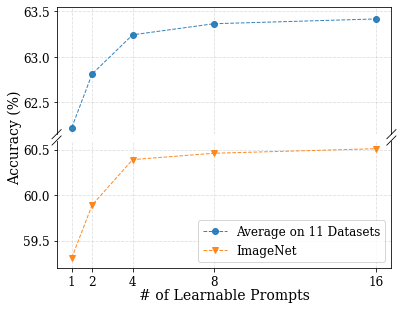

In [8]:
df = pd.read_excel('num_prompts.xlsx', index_col=0)  
x = [1,2,4,8,16]
# x = [2,4,8,16]
labels = x
ys = {
    # 'Average on 11 Datasets': [df['avg'][i] for i in x],
    # 'ImageNet': [df['ImageNet'][i] for i in x],
    # 'UCF101': [df['UCF101'][i] for i in x],
    'Average on 11 Datasets': [62.22272727, 62.81181818, 63.24272727, 63.36454545,63.41727273],
    'ImageNet': [59.31, 59.89, 60.39, 60.46, 60.51],
}
fig = plt.figure(figsize=(6,4.8))
# bax = brokenaxes(ylims=((59.7, 61.1), (62.3, 63.5), (65, 66.2)), hspace=.05)
bax = brokenaxes(ylims=((59.2, 60.6), (62.15, 63.55)), hspace=.05, despine=False)
# bax = brokenaxes(ylims=((62.25, 63.5), (65, 66.2)), hspace=.05)

bax.set_xticks(x, x)
marker= ['o', 'v', '*', 'X']
for (label, y), m in zip(ys.items(), marker):
    bax.plot(x, y, '--', marker=m, alpha=0.9, lw=1, markersize=6,label=label)
# bax.legend(loc=3)
bax.legend(loc=4)
bax.set_ylabel('Accuracy (%)', labelpad=35)
bax.set_xlabel('# of Learnable Prompts', labelpad=20)
bax.axs[0].grid(axis='both', which='major', ls='--', alpha=0.4)
bax.axs[1].grid(axis='both', which='major', ls='--', alpha=0.4)
bax.axs[0].set_xticks(x,x)
bax.axs[1].set_xticks(x,x)
plt.savefig(f'paperfig/ablation/num_prompts.pdf', bbox_inches='tight')
plt.show()

59.42


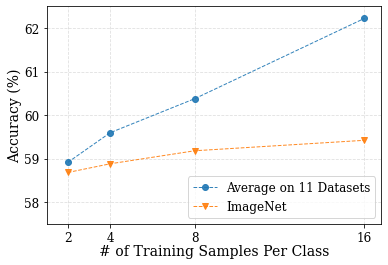

In [9]:
df = pd.read_excel('num_shots.xlsx', index_col=0)  
# x = [0, 1,2,4,8,16]
x = [2,4,8,16]
labels = x
ys = {
    'Average on 11 Datasets': [df['avg'][i] for i in x],
    'ImageNet': [df['ImageNet'][i]-0.5 for i in x],
    # 'UCF101': df['UCF101'],
}
print(ys['ImageNet'][-1])
fig = plt.figure()
# bax = brokenaxes(ylims=((59.7, 61.1), (62.3, 63.5), (65, 66.2)), hspace=.05)
# bax = brokenaxes(ylims=((57, 63), (66, 72)), hspace=.05)
bax = brokenaxes(ylims=((57.5,62.5),), despine=False)

bax.set_xticks(x, x)
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
marker= ['o', 'v', '*', 'X']
for (label, y), c, m in zip(ys.items(), color, marker):
    bax.plot(x, y, '--', marker=m, c=c, alpha=0.9, lw=1, markersize=6,label=label)
    # bax.plot(x[1:], y[1:], '--', marker=m, c=c, alpha=0.9, lw=1, markersize=6,label=label)
    # bax.plot(x[:1], y[:1], '--', marker=m, c=c, alpha=0.9, lw=1, markersize=6,label=None)
bax.plot([x[0]])
# bax.legend(loc=3)
bax.set_xlim(1)
bax.legend(loc=4)
bax.set_ylabel('Accuracy (%)', labelpad=25)
bax.set_xlabel('# of Training Samples Per Class', labelpad=20)
bax.axs[0].grid(axis='both', which='major', ls='--', alpha=0.4)
# bax.axs[1].grid(axis='both', which='major', ls='--', alpha=0.4)
bax.axs[0].set_xticks(x,x)
# bax.axs[1].set_xticks(x,x)
plt.savefig(f'paperfig/ablation/num_shots.pdf', bbox_inches='tight')
plt.show()

In [ ]:
def get_per_class_precision(logits, test_targets, topk):
    num_classes = logits.shape[-1]
    confs, preds = logits.max(dim=-1)
    class_gt = defaultdict(list)
    class_conf = defaultdict(list)
    for conf, pred, label in zip(confs, preds, test_targets):
        class_gt[int(pred)].append(int(label))
        class_conf[int(pred)].append(float(conf))
    topk_acc = [0 for i in range(num_classes)]
    topk_conf = [[] for i in range(num_classes)]
    tot = 0
    tot_correct = 0
    for i in class_conf.keys():
        conf, idx = torch.tensor(class_conf[i]).topk(min(len(class_conf[i]),topk))
        gt = torch.tensor(class_gt[i])[idx]
        correct = gt.eq(i).sum()
        acc = correct/gt.shape[-1]
        tot_correct += correct
        tot += gt.shape[-1]
        topk_acc[i] = float(acc)*100
        topk_conf[i] = conf
    print(f"{tot_correct*100/tot:.2f}")
    return topk_acc, topk_conf

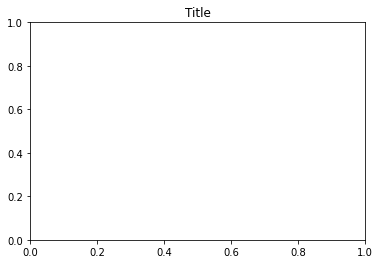

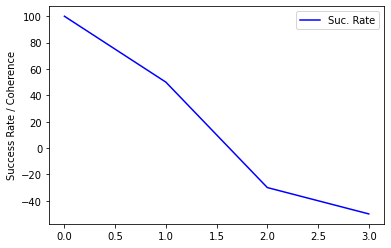

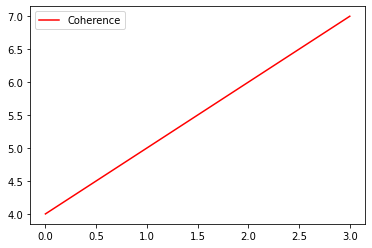

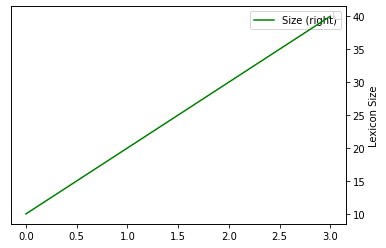

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Some sample data
df = pd.DataFrame({'C' : [4,5,6,7], 'S' : [10,20,30,40],'R' : [100,50,-30,-50]})

fig=plt.figure()
plt.title('Title')

ax1 = df.plot(y='R', style='b', label='Suc. Rate')
ax1.set_ylabel('Success Rate / Coherence')

ax2 = df.plot(y='C',style='r', label='Coherence')

ax3 = df.plot(y='S', secondary_y=True, style='g', label='Size')
ax3.set_ylabel('Lexicon Size')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()